In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
!pip install imbalanced-learn

     ------------------------------------- 258.3/258.3 kB 16.5 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
data = pd.read_csv(r"C:\Users\hussa\Downloads\4. Reproductive Child-Healthcare.csv")

In [4]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.003,0.000,0.004,0.004,0.0,0.000,30.0,1.5,0.0,...,67.0,169.0,9.0,1.0,147.0,137.0,144.0,40.0,1.0,1.0
1,130.0,0.001,0.001,0.012,0.010,0.0,0.001,62.0,2.2,0.0,...,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
2,141.0,0.000,0.008,0.000,0.000,0.0,0.000,75.0,0.3,49.0,...,136.0,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
3,144.0,0.000,0.002,0.002,0.000,0.0,0.000,84.0,0.3,34.0,...,132.0,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0
4,106.0,0.001,0.000,0.011,0.000,0.0,0.000,63.0,0.6,0.0,...,95.0,125.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,138.0,0.012,0.000,0.007,0.001,0.0,0.000,50.0,1.2,0.0,...,73.0,171.0,7.0,0.0,148.0,146.0,148.0,11.0,1.0,1.0
1484,133.0,0.005,0.000,0.005,0.004,0.0,0.000,27.0,1.8,0.0,...,61.0,153.0,5.0,1.0,142.0,134.0,140.0,29.0,1.0,1.0
1485,110.0,0.003,0.002,0.006,0.007,0.0,0.002,68.0,3.1,0.0,...,60.0,193.0,8.0,0.0,91.0,83.0,95.0,42.0,-1.0,3.0
1486,130.0,0.005,0.000,0.001,0.000,0.0,0.000,73.0,0.6,9.0,...,126.0,158.0,2.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1488 non-null   float64
 1   accelerations                                           1488 non-null   float64
 2   fetal_movement                                          1488 non-null   float64
 3   uterine_contractions                                    1488 non-null   float64
 4   light_decelerations                                     1488 non-null   float64
 5   severe_decelerations                                    1488 non-null   float64
 6   prolongued_decelerations                                1488 non-null   float64
 7   abnormal_short_term_variability                         1488 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.fetal_health.value_counts()

1.0    1158
2.0     207
3.0     123
Name: fetal_health, dtype: int64

In [7]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,...,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.00000,1488.000000,1488.000000,1488.000000,1488.000000
mean,133.100806,0.003222,0.009307,0.004360,0.001916,0.000002,0.000169,46.719758,1.343011,9.470430,...,93.061156,164.114247,4.061156,0.336022,137.337366,134.44422,137.972446,19.331989,0.325269,1.304435
std,10.037418,0.003876,0.044165,0.002972,0.002961,0.000045,0.000623,17.325868,0.890912,18.030735,...,29.458569,18.373700,2.967594,0.753378,16.530802,15.67541,14.589470,29.838886,0.612891,0.614272
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,76.00000,77.000000,0.000000,-1.000000,1.000000
25%,125.750000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,127.750000,124.00000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,163.000000,3.000000,0.000000,139.000000,136.00000,139.000000,8.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,10.000000,...,119.000000,175.000000,6.000000,0.000000,148.000000,145.00000,148.000000,25.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,158.000000,238.000000,18.000000,10.000000,187.000000,182.00000,186.000000,269.000000,1.000000,3.000000


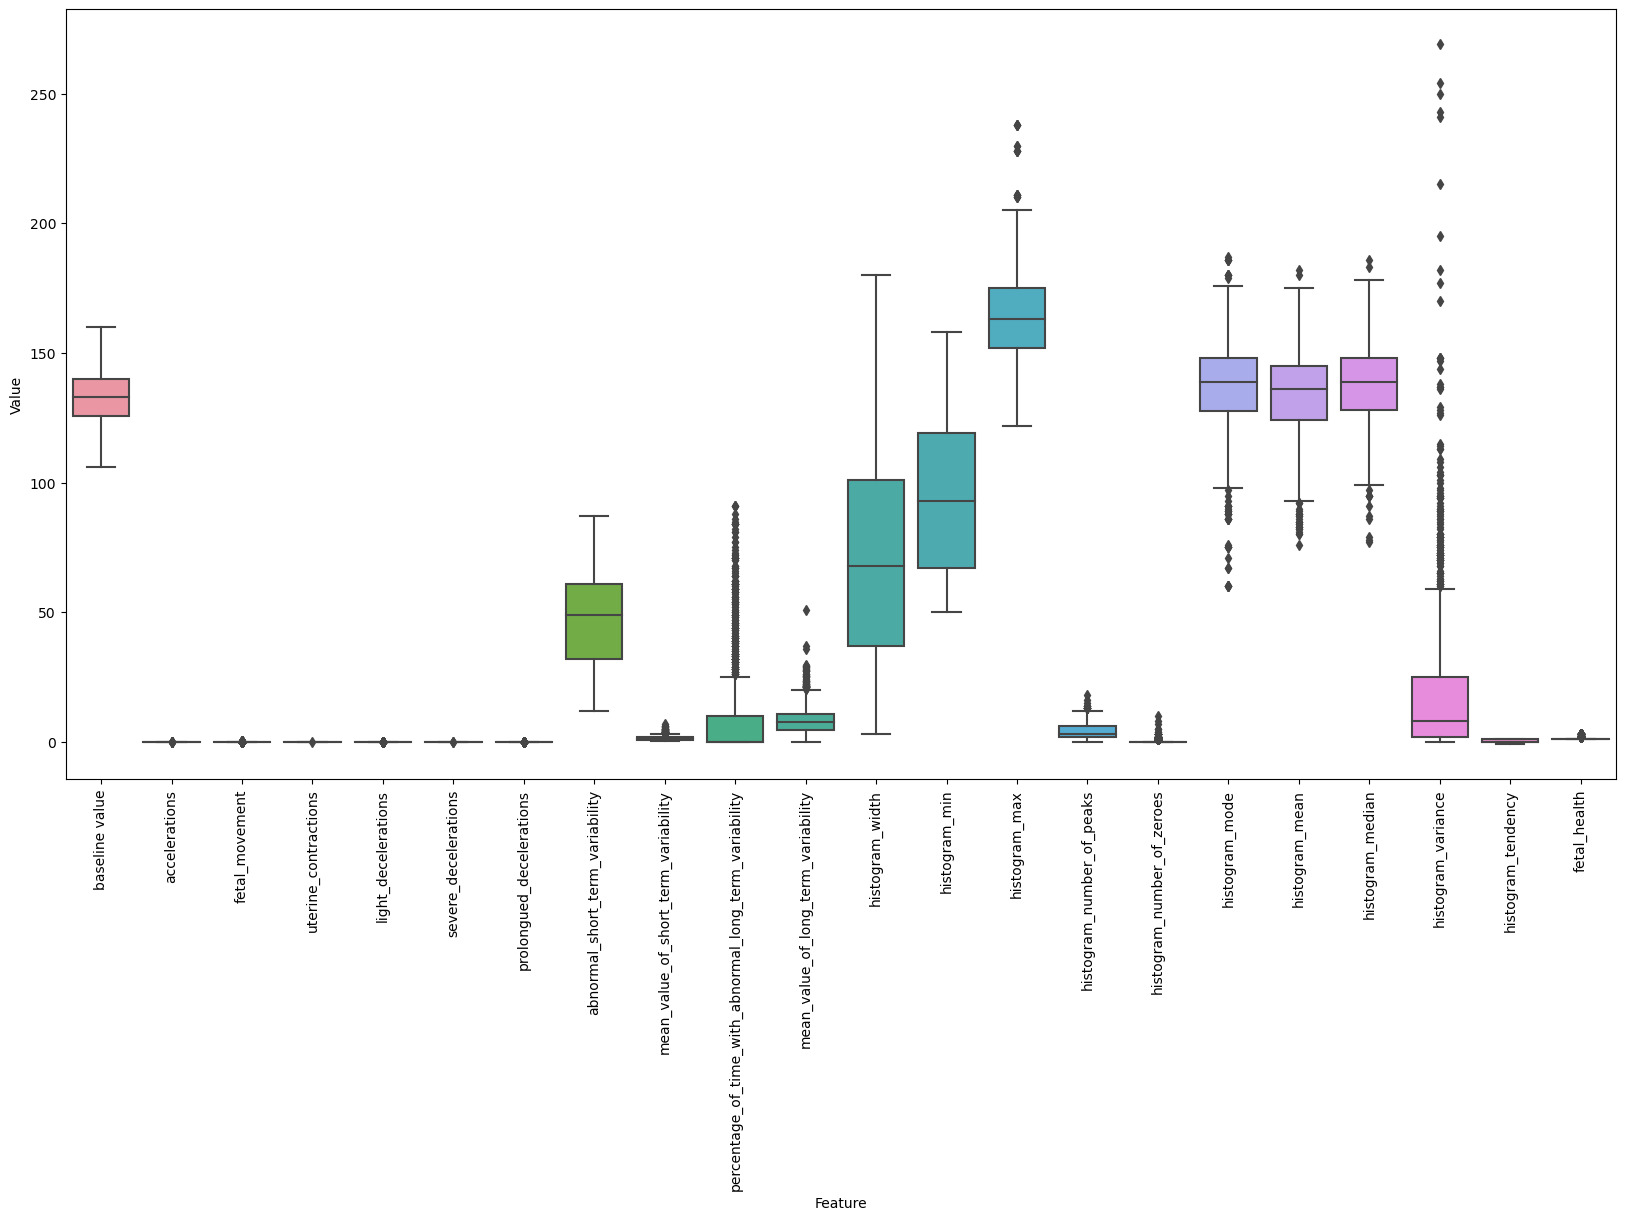

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
plt.figure(figsize=(20, 10))

# Reshape the DataFrame into a long format
data_melted = data.melt(var_name='Feature', value_name='Value')

# Create the boxplot
sns.boxplot(x='Feature', y='Value', data=data_melted)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

plt.show()


In [14]:
data.duplicated().any()

True

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.shape

(1480, 22)

In [17]:
data.size

32560

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1487
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1480 non-null   float64
 1   accelerations                                           1480 non-null   float64
 2   fetal_movement                                          1480 non-null   float64
 3   uterine_contractions                                    1480 non-null   float64
 4   light_decelerations                                     1480 non-null   float64
 5   severe_decelerations                                    1480 non-null   float64
 6   prolongued_decelerations                                1480 non-null   float64
 7   abnormal_short_term_variability                         1480 non-null   float64
 8   mean_value_of_short_term_variability  

In [19]:
print("no. of duplicates removed are :",1487-1480)

no. of duplicates removed are : 7


## Distribution of the dataset

In [20]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

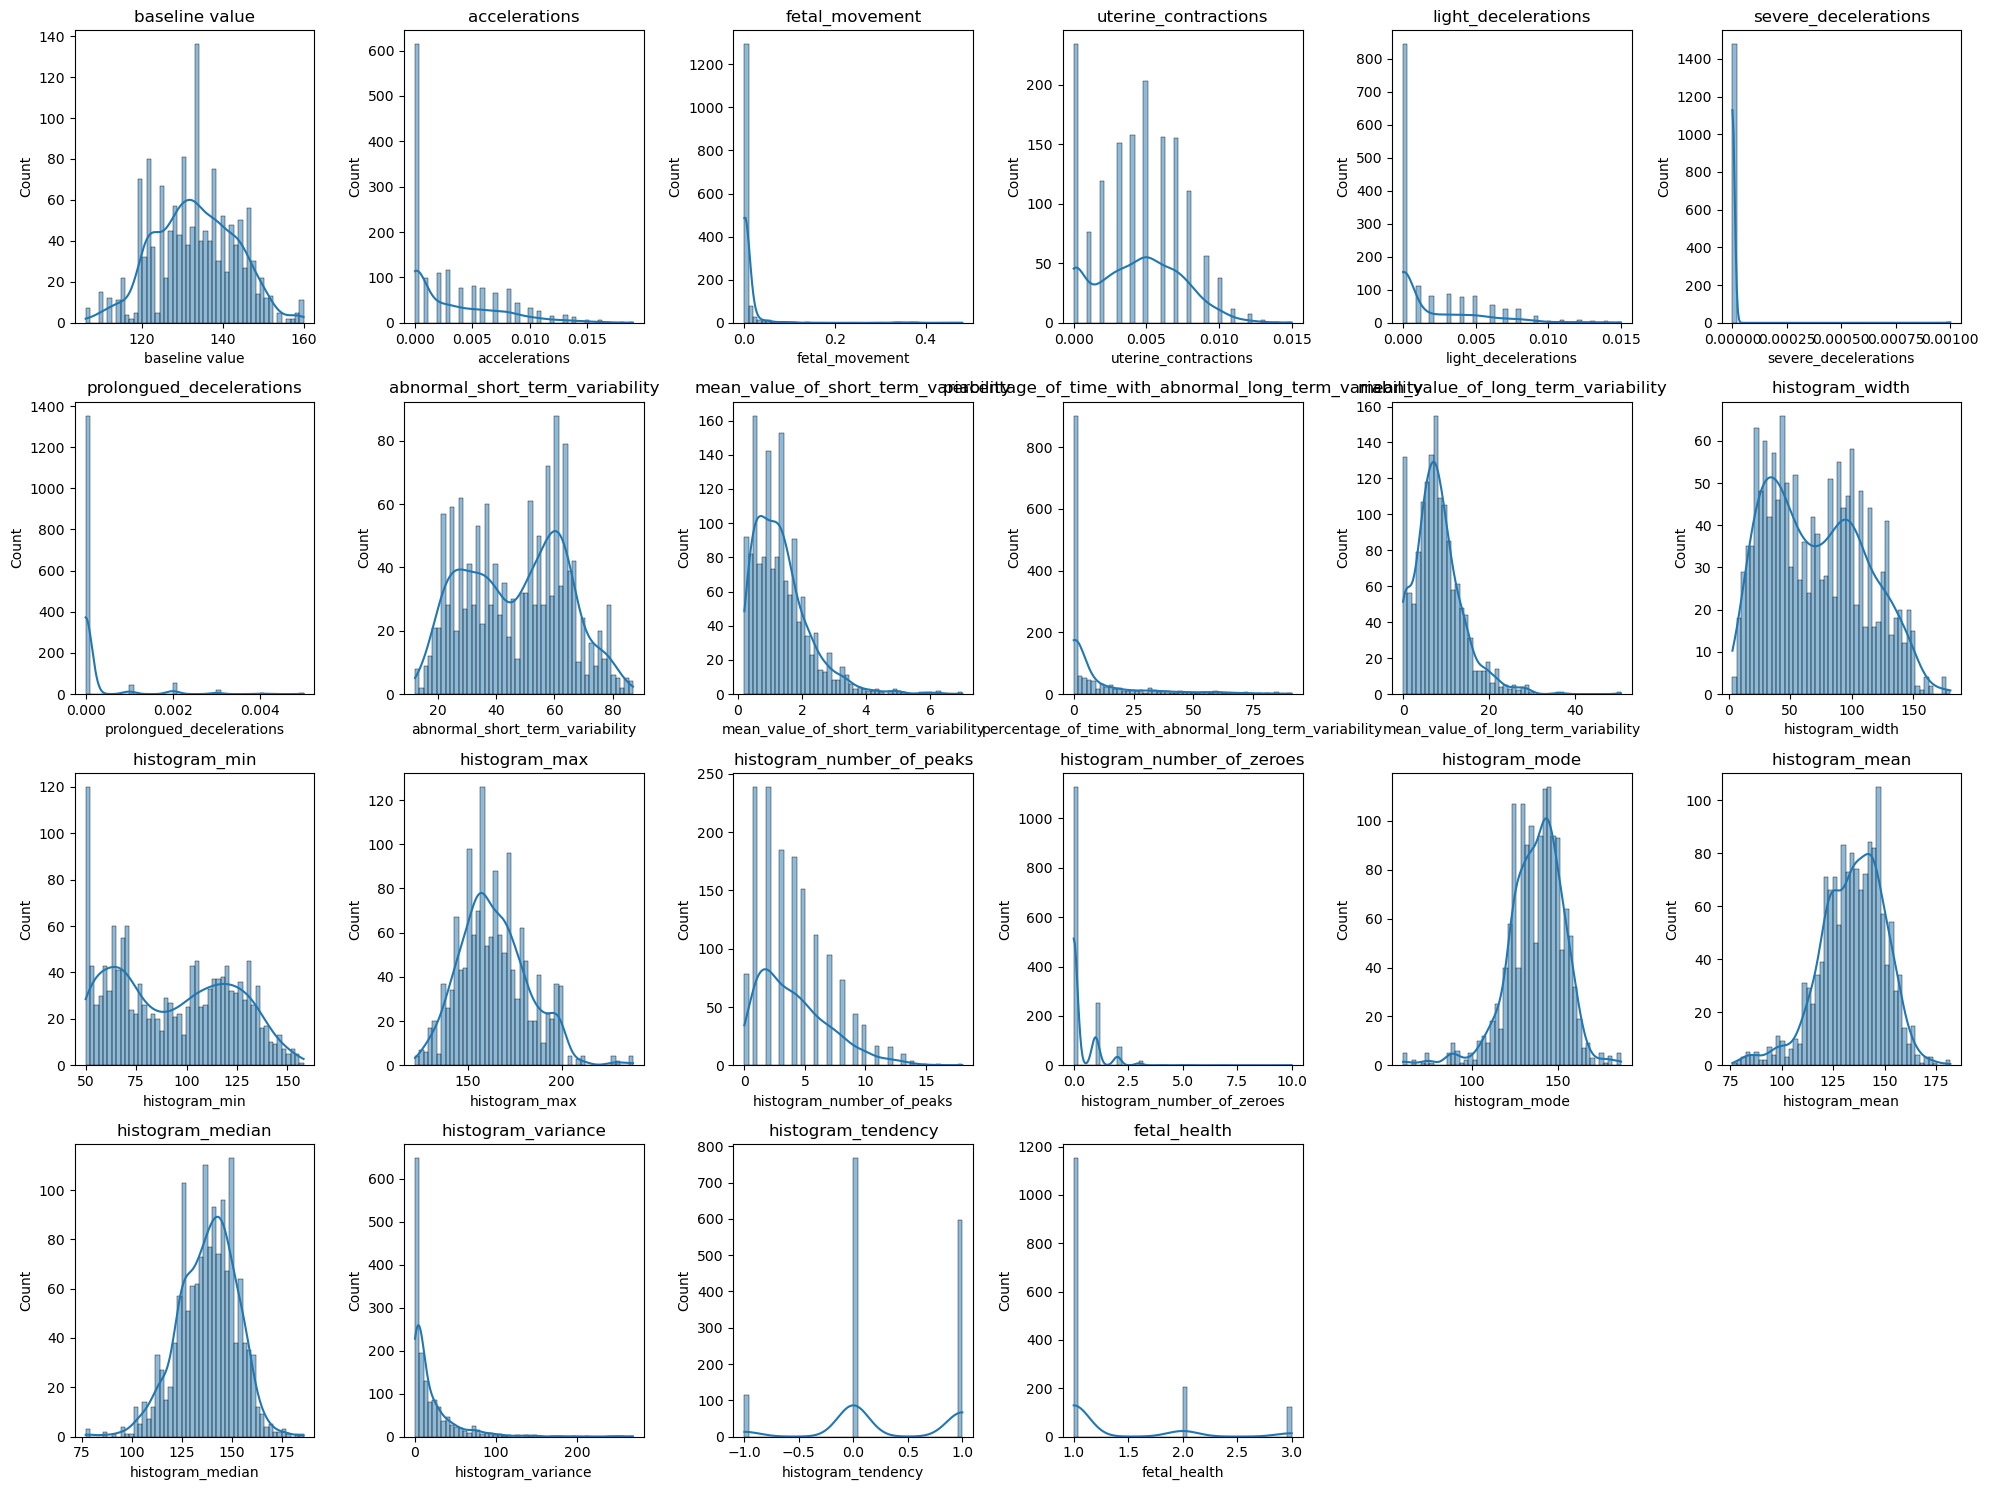

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 6, i)  # Adjust to 4 rows and 6 columns to fit all 22 columns
    sns.histplot(data[column], bins=50, kde=True)  # Using sns.histplot instead of sns.distplot
    plt.title(column)

plt.tight_layout()
plt.show()


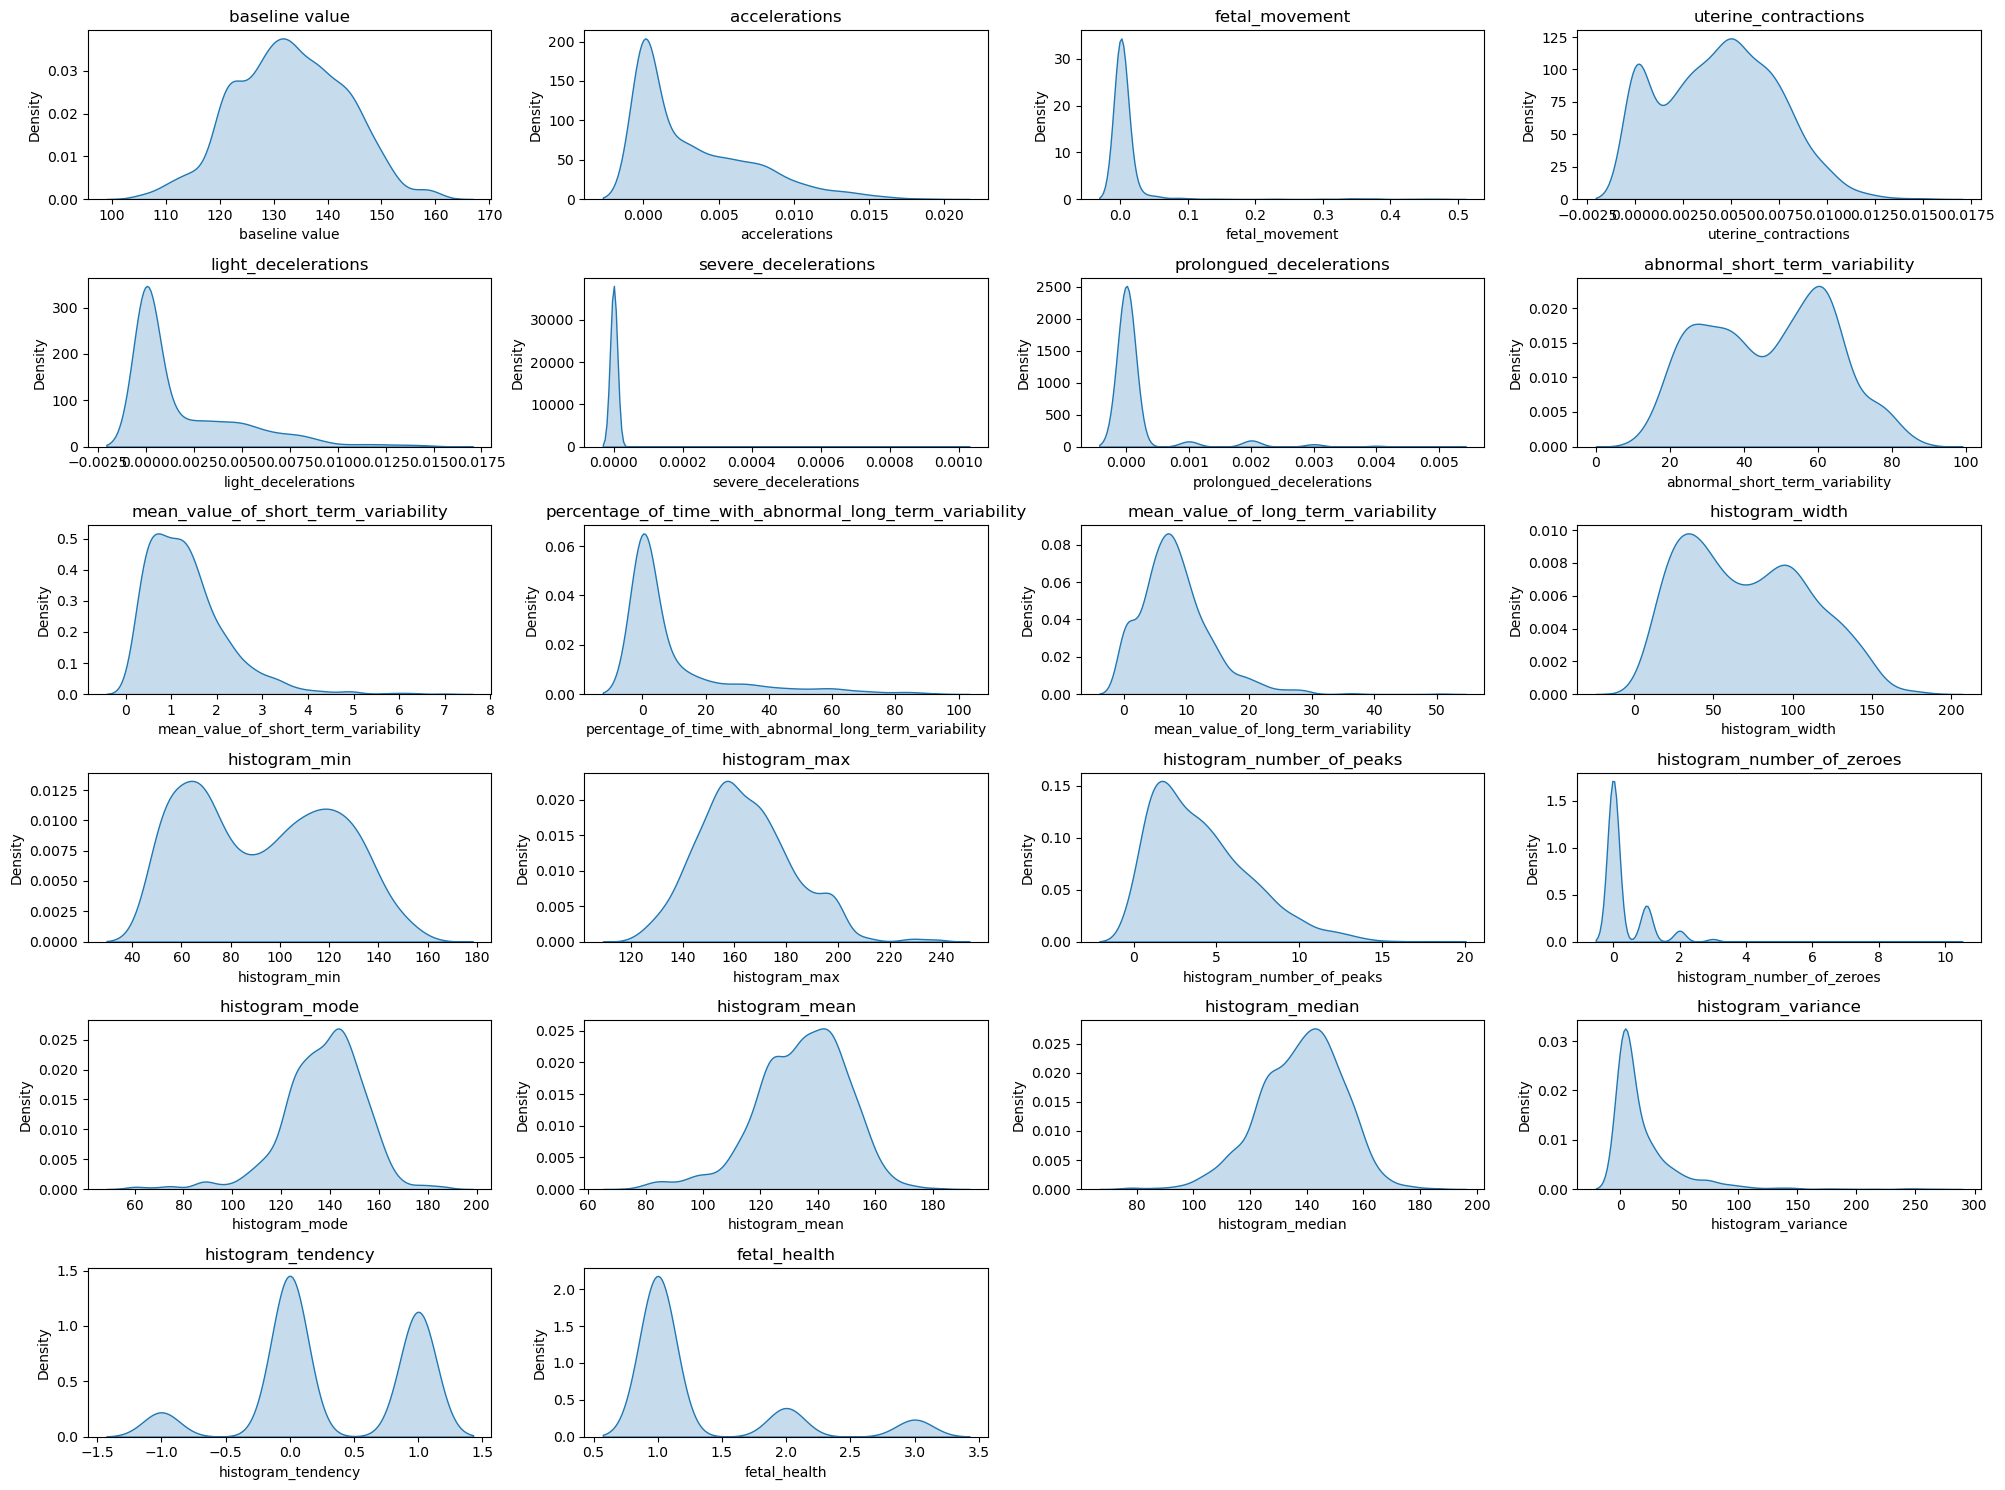

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
plt.figure(figsize=(20, 15))

num_columns = len(data.select_dtypes(include='number').columns)
num_rows = (num_columns // 4) + (num_columns % 4 > 0)

for i, column in enumerate(data.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.kdeplot(data[column], shade=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<AxesSubplot:>

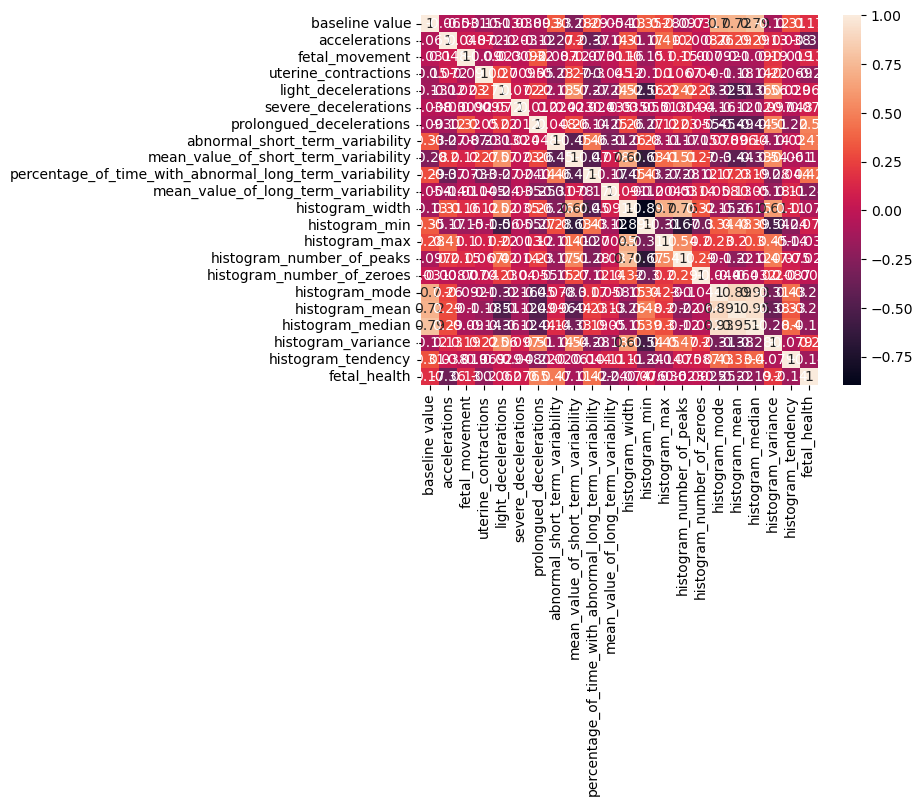

In [25]:
# lets check for any existance of multicollinearity
sns.heatmap(data.corr(),annot = True)


In [26]:
# now the feature lables are 
X = data.drop("fetal_health",axis = 1)

In [27]:
y = data["fetal_health"]

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

<AxesSubplot:>

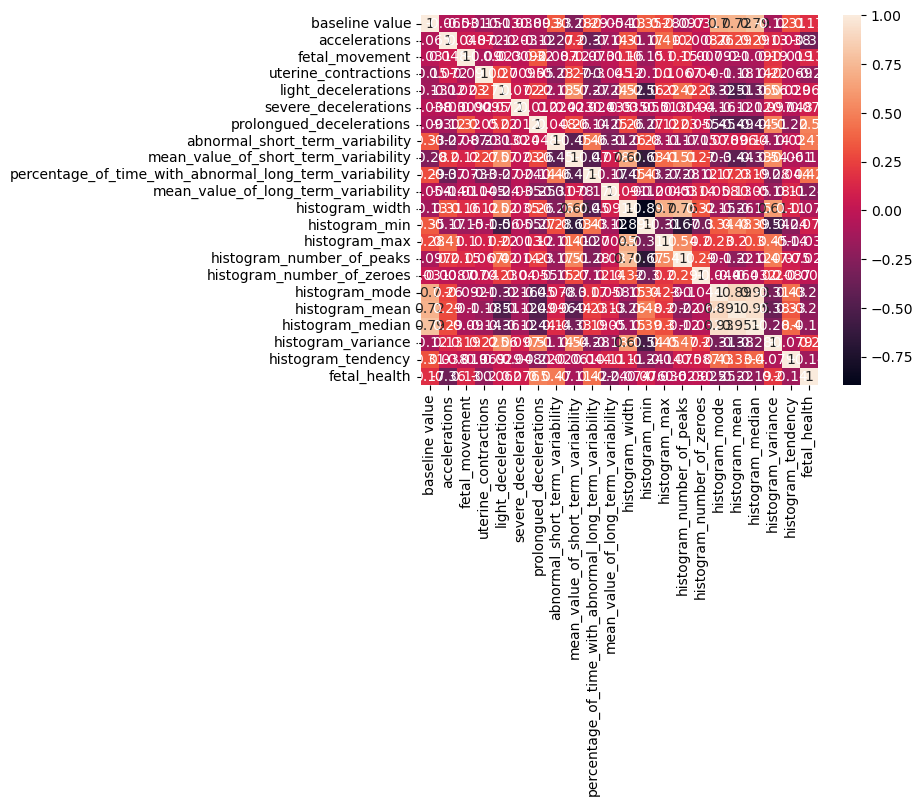

In [29]:
sns.heatmap(data.corr(),annot = True)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.3,random_state=2)

In [31]:
print("the X_train dataset size is : ",X_train.shape)
print("the X_test dataset size is : ",X_test.shape)
print("the y_train dataset size is : ",y_train.shape)
print("the X_test dataset size is : ",X_test.shape)

the X_train dataset size is :  (1036, 21)
the X_test dataset size is :  (444, 21)
the y_train dataset size is :  (1036,)
the X_test dataset size is :  (444, 21)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.30819377,  1.01836848, -0.19732303, ...,  0.34601032,
         0.35476168, -0.55383127],
       [-0.10956935, -0.55983607, -0.21771269, ..., -0.07308558,
         0.42330571,  1.09493078],
       [-0.20888156, -0.55983607, -0.21771269, ..., -0.07308558,
        -0.12504654,  1.09493078],
       ...,
       [-0.10956935, -0.29680198, -0.21771269, ...,  0.276161  ,
         0.25194563,  1.09493078],
       [-1.10269141,  0.49230029, -0.21771269, ..., -0.84142805,
         0.42330571, -0.55383127],
       [-0.80475479,  1.28140257, -0.21771269, ..., -0.07308558,
        -0.43349469, -0.55383127]])

In [37]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [39]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model and parameter grid
model_lr = LogisticRegression()
params_LR = {
    "tol": [0.0001, 0.0002, 0.0003],
    "C": [0.01, 0.1, 1, 10, 100],
    "intercept_scaling": [1, 2, 3, 4],
    "solver": ["liblinear", "lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300]
}

# Perform grid search
grid_search_lr = GridSearchCV(estimator=model_lr, 
                              param_grid=params_LR, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_lr.fit(X_train, y_train)

# Predictions and metrics
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"Logistic Regression - Best Score: {round(grid_search_lr.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_lr}, \nPrecision: {precision_lr}, \nRecall: {recall_lr}, \nF1 Score: {f1_lr}")


Logistic Regression - Best Score: 0.897

Accuracy: 0.8918918918918919, 
Precision: 0.850724785200497, 
Recall: 0.7517716237985356, 
F1 Score: 0.7939088245970911


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model and parameter grid
model_dt = DecisionTreeClassifier()
params_DT = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform grid search
grid_search_dt = GridSearchCV(estimator=model_dt, 
                              param_grid=params_DT, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_dt.fit(X_train, y_train)

# Predictions and metrics
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print(f"Decision Tree - Best Score: {round(grid_search_dt.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_dt}, \nPrecision: {precision_dt}, \nRecall: {recall_dt}, \nF1 Score: {f1_dt}")


Decision Tree - Best Score: 0.928

Accuracy: 0.9346846846846847, 
Precision: 0.9080676421101953, 
Recall: 0.8508139523964408, 
F1 Score: 0.8747779885645798


## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model and parameter grid
model_knn = KNeighborsClassifier()
params_KNN = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Perform grid search
grid_search_knn = GridSearchCV(estimator=model_knn, 
                               param_grid=params_KNN, 
                               cv=3, 
                               scoring="accuracy", 
                               return_train_score=True)
grid_search_knn.fit(X_train, y_train)

# Predictions and metrics
y_pred_knn = grid_search_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"KNN - Best Score: {round(grid_search_knn.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_knn}, \nPrecision: {precision_knn}, \nRecall: {recall_knn}, \nF1 Score: {f1_knn}")


KNN - Best Score: 0.899

Accuracy: 0.8941441441441441, 
Precision: 0.8416209046292611, 
Recall: 0.7965076324310666, 
F1 Score: 0.8167561178199477


## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

# Define the model
model_nb = GaussianNB()

# Fit the model
model_nb.fit(X_train, y_train)

# Predictions and metrics
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print(f"\nNaive Bayes - Accuracy: {accuracy_nb}, \nPrecision: {precision_nb}, \nRecall: {recall_nb}, \nF1 Score: {f1_nb}")



Naive Bayes - Accuracy: 0.8423423423423423, 
Precision: 0.7129740023182646, 
Recall: 0.7990499264544559, 
F1 Score: 0.7417556905460131


## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameter grid
model_rf = RandomForestClassifier()
params_RF = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Perform grid search
grid_search_rf = GridSearchCV(estimator=model_rf, 
                              param_grid=params_RF, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Predictions and metrics
y_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(f"Random Forest - Best Score: {round(grid_search_rf.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_rf}, \nPrecision: {precision_rf}, \nRecall: {recall_rf}, \nF1 Score: {f1_rf}")


Random Forest - Best Score: 0.946

Accuracy: 0.9346846846846847, 
Precision: 0.9191131393949652, 
Recall: 0.861447536800517, 
F1 Score: 0.885139988036259


## Support Vector Mechanism

In [44]:
from sklearn.svm import SVC

# Define the model and parameter grid
model_svm = SVC()
params_SVM = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}

# Perform grid search
grid_search_svm = GridSearchCV(estimator=model_svm, 
                               param_grid=params_SVM, 
                               cv=3, 
                               scoring="accuracy", 
                               return_train_score=True)
grid_search_svm.fit(X_train, y_train)

# Predictions and metrics
y_pred_svm = grid_search_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"SVM - Best Score: {round(grid_search_svm.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_svm}, \nPrecision: {precision_svm}, \nRecall: {recall_svm}, \nF1 Score: {f1_svm}")


SVM - Best Score: 0.929

Accuracy: 0.9076576576576577, 
Precision: 0.841481964644543, 
Recall: 0.8489302815560752, 
F1 Score: 0.8435696927407906
